# Import package library and global parameter settings

In [1]:
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error #均方误差
from sklearn.metrics import mean_absolute_error #平方绝对误差
from sklearn.metrics import r2_score  #R square

In [4]:
dir_open = r'D:\DoctoralThesis\CorrForScattAna'
dir_write = dir_open

In [6]:
dfGDCalCDOMTBRMaxCorrModel20102020 = pd.read_excel(os.path.join(dir_open,"CDOM(88Points)ThreeBandModelCalibration.xlsx"),index_col ='Wavelength')
dfGDValCDOMTBRMaxCorrModel20102020 = pd.read_excel(os.path.join(dir_open,"CDOM(88Points)ThreeBandModelValidation.xlsx"),index_col = 'Wavelength')
dfCalSpecCDOMTBRMaxCorr = dfGDCalCDOMTBRMaxCorrModel20102020['677_662_715']
dfValSpecCDOMTBRMaxCorr = dfGDValCDOMTBRMaxCorrModel20102020['677_662_715']

dfCalMeasuredCDOM = dfGDCalCDOMTBRMaxCorrModel20102020['CDOM']
lenCalCDOMSamplingPointsNum = len(dfCalMeasuredCDOM)
dfValMeasuredCDOM = dfGDValCDOMTBRMaxCorrModel20102020['CDOM']
lenValCDOMSamplingPointsNum = len(dfValMeasuredCDOM)

# 建立线性回归模型
regrCalTBRMaxMeaCDOM = linear_model.LinearRegression()
# 拟合
regrCalTBRMaxMeaCDOM.fit(np.array(dfCalSpecCDOMTBRMaxCorr).reshape(lenCalCDOMSamplingPointsNum,1),
                         np.array(dfCalMeasuredCDOM).reshape(lenCalCDOMSamplingPointsNum,1))

myK_CalTBRMaxMeaCDOM = "%.2f" %regrCalTBRMaxMeaCDOM.coef_    
myIntercept_CalTBRMaxMeaCDOM = "%.2f" %regrCalTBRMaxMeaCDOM.intercept_   
predictedGDCalCDOM20102020 = regrCalTBRMaxMeaCDOM.predict(np.array(dfCalSpecCDOMTBRMaxCorr).reshape(lenCalCDOMSamplingPointsNum,1))

myMSE_CalTBRMaxMeaCDOM = mean_squared_error(np.array(dfCalMeasuredCDOM).reshape(lenCalCDOMSamplingPointsNum,1),
                                               predictedGDCalCDOM20102020)
print("MSE_CalTBRMaxMeaCDOM:\t{0}".format(myMSE_CalTBRMaxMeaCDOM))
myRMSE_CalTBRMaxMeaCDOM = np.sqrt(mean_squared_error(np.array(dfCalMeasuredCDOM).reshape(lenCalCDOMSamplingPointsNum,1),
                                                        predictedGDCalCDOM20102020))
print("RMSE_CalTBRMaxMeaCDOM:\t{0}".format(myRMSE_CalTBRMaxMeaCDOM))
myMAE_CalTBRMaxMeaCDOM = mean_absolute_error(np.array(dfCalMeasuredCDOM).reshape(lenCalCDOMSamplingPointsNum,1),
                                                predictedGDCalCDOM20102020)
print("MAE_CalTBRMaxMeaCDOM:\t{0}".format(myMAE_CalTBRMaxMeaCDOM))
myR2_CalTBRMaxMeaCDOM = r2_score(np.array(dfCalMeasuredCDOM).reshape(lenCalCDOMSamplingPointsNum,1),
                                    predictedGDCalCDOM20102020)
print("R2_CalTBRMaxMeaCDOM:\t{0}".format(myR2_CalTBRMaxMeaCDOM))

MSE_CalTBRMaxMeaCDOM:	0.02963252847940478
RMSE_CalTBRMaxMeaCDOM:	0.172141013356506
MAE_CalTBRMaxMeaCDOM:	0.13532213582611144
R2_CalTBRMaxMeaCDOM:	0.746133913091723


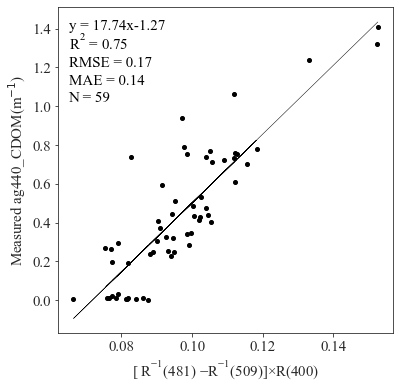

In [73]:
x = np.array(dfCalSpecCDOMTBRMaxCorr).reshape(lenCalCDOMSamplingPointsNum,1)
y = np.array(predictedGDCalCDOM20102020).reshape(lenCalCDOMSamplingPointsNum,1)
plt.figure(figsize=(6,6))

plt.xticks(fontproperties = 'Times New Roman',fontsize = 15)
plt.yticks(fontproperties = 'Times New Roman',fontsize = 15)
plt.plot(x,y,linewidth = 0.5,color = "k")

plt.xlabel('[ $\mathregular{R^{-1}} $(677) $\mathregular{-R^{-1}} $(662)]×R(715)',fontproperties = 'Times New Roman',fontsize=15) 
plt.ylabel('Measured ag440_CDOM(m$^{-1}$)',fontproperties = 'Times New Roman',fontsize=15) 

#plt.text(-0.06,57,"GD", size = 15,color = "k",weight = "light")
plt.text(0.065,1.395,"y = {k}x{b}".format(k = myK_CalTBRMaxMeaCDOM,b = myIntercept_CalTBRMaxMeaCDOM), 
         fontproperties = 'Times New Roman',size = 15,color = "k",weight = "light")
plt.text(0.065,1.29,"$\mathregular{R^2}$ = %.2f"%myR2_CalTBRMaxMeaCDOM, fontproperties = 'Times New Roman',
         size = 15,color = "k",weight = "light")
plt.text(0.065,1.20,"RMSE = %.2f"%myRMSE_CalTBRMaxMeaCDOM, fontproperties = 'Times New Roman',
         size = 15,color = "k",weight = "light") 
plt.text(0.065,1.11,"MAE = %.2f"%myMAE_CalTBRMaxMeaCDOM,fontproperties = 'Times New Roman', 
         size = 15,color = "k",weight = "light")
plt.text(0.065,1.02,"N = {lenCalCDOMSamplingPointsNum}".format(lenCalCDOMSamplingPointsNum = lenCalCDOMSamplingPointsNum), 
         fontproperties = 'Times New Roman',size = 15,color = "k",weight = "light")

plt.plot(x,np.array(dfCalMeasuredCDOM).reshape(lenCalCDOMSamplingPointsNum,1),'o',color='k',label="Calibration", markersize = 4)

plt.savefig(os.path.join(dir_write,'GD20062020(332points)_CDOM(88Points)TBRRatioMaxCorrCDOMCalibration.jpg'),
            dpi=300,bbox_inches='tight')
plt.show()

In [7]:
predictedGDValCDOM20102020 = regrCalTBRMaxMeaCDOM.predict(np.array(dfValSpecCDOMTBRMaxCorr).reshape(lenValCDOMSamplingPointsNum,1))
regrMeaPreCDOM = linear_model.LinearRegression() 
regrMeaPreCDOM.fit(np.array(dfValMeasuredCDOM).reshape(lenValCDOMSamplingPointsNum,1),predictedGDValCDOM20102020)

myK_Mea_PreCDOM = "%.2f" %regrMeaPreCDOM.coef_    
myIntercept_Mea_PreCDOM = "%.2f" %regrMeaPreCDOM.intercept_   

myMSE_ValTBRMaxMeaCDOM = mean_squared_error(np.array(dfValMeasuredCDOM).reshape(lenValCDOMSamplingPointsNum,1),
                                               predictedGDValCDOM20102020)
print("MSE_ValTBRMaxMeaCDOM:\t{0}".format(myMSE_ValTBRMaxMeaCDOM))
myRMSE_ValTBRMaxMeaCDOM = np.sqrt(mean_squared_error(np.array(dfValMeasuredCDOM).reshape(lenValCDOMSamplingPointsNum,1),
                                                        predictedGDValCDOM20102020))
print("RMSE_ValTBRMaxMeaCDOM:\t{0}".format(myRMSE_ValTBRMaxMeaCDOM))
myMAE_ValTBRMaxMeaCDOM = mean_absolute_error(np.array(dfValMeasuredCDOM).reshape(lenValCDOMSamplingPointsNum,1),
                                                predictedGDValCDOM20102020)
print("MAE_ValTBRMaxMeaCDOM:\t{0}".format(myMAE_ValTBRMaxMeaCDOM))
myR2_ValTBRMaxMeaCDOM = r2_score(np.array(dfValMeasuredCDOM).reshape(lenValCDOMSamplingPointsNum,1),
                                    predictedGDValCDOM20102020)
print("R2_ValTBRMaxMeaCDOM:\t{0}".format(myR2_ValTBRMaxMeaCDOM))

MSE_ValTBRMaxMeaCDOM:	0.022470786207786864
RMSE_ValTBRMaxMeaCDOM:	0.14990258906298737
MAE_ValTBRMaxMeaCDOM:	0.1214745086159751
R2_ValTBRMaxMeaCDOM:	0.7997397745291096


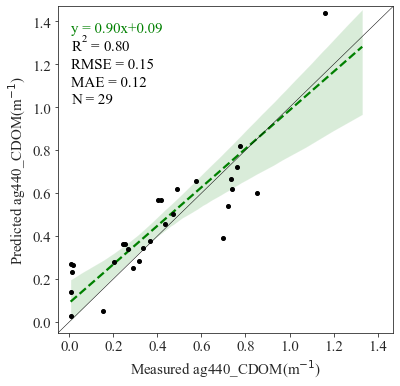

In [8]:
val_data_outputs_CDOM = np.array(dfValMeasuredCDOM).reshape(lenValCDOMSamplingPointsNum,1)
val_data_outputs_pred_CDOM = predictedGDValCDOM20102020
plt.figure(figsize=(6,6))

sns.set_style("ticks",{"xtick.major.size": 8, "ytick.major.size": 8}) 

sns.regplot(x=val_data_outputs_CDOM,y=val_data_outputs_pred_CDOM, scatter=False, marker= 'o',color='k',
            line_kws={'linestyle':'--','color':'green'},  
            label="Validation",truncate=True,ci=95)

plt.xlim((-0.05,1.47))
plt.ylim((-0.05,1.47))
plt.xticks(fontproperties = 'Times New Roman',fontsize = 15)
plt.yticks(fontproperties = 'Times New Roman',fontsize = 15)

z = range(-1,5,1)
plt.plot(z,z,linewidth = 0.5,color = "k")

plt.xlabel('Measured ag440_CDOM(m$^{-1}$)',fontproperties = 'Times New Roman',fontsize = 15)
plt.ylabel('Predicted ag440_CDOM(m$^{-1}$)',fontproperties = 'Times New Roman',fontsize = 15) 

#plt.text(1,56,"GD", size = 15,color = "k",weight = "light")
plt.text(0.01,1.35,"y = {k}x+{b}".format(k = myK_Mea_PreCDOM,b = myIntercept_Mea_PreCDOM),
         fontproperties = 'Times New Roman', size = 15,color = "green",weight = "light")
plt.text(0.01,1.26,"$\mathregular{R^2}$ = %.2f"%myR2_ValTBRMaxMeaCDOM,fontproperties = 'Times New Roman', 
         size = 15,color = "k",weight = "light")
plt.text(0.01,1.18,"RMSE = %.2f"%myRMSE_ValTBRMaxMeaCDOM, fontproperties = 'Times New Roman',size = 15,color = "k",weight = "light")
plt.text(0.01,1.1,"MAE = %.2f"%myMAE_ValTBRMaxMeaCDOM,fontproperties = 'Times New Roman', size = 15,color = "k",weight = "light")
plt.text(0.01,1.02,"N = {lenValCDOMSamplingPointsNum}".format(lenValCDOMSamplingPointsNum = lenValCDOMSamplingPointsNum),
         fontproperties = 'Times New Roman',size = 15,color = "k",weight = "light")

plt.plot(val_data_outputs_CDOM,val_data_outputs_pred_CDOM,'o',color='k',label="Validation", markersize = 4)

plt.savefig(os.path.join(dir_write,'CDOM(88Points)TBRCDOMPreValidation.jpg'),dpi=300,bbox_inches='tight')
plt.show()